<a href="https://colab.research.google.com/github/SHWETANKD15/Zela-_Churn/blob/main/DAI_101_ASSIGNMENT_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zela Churn Prediction


A Telecom company Zela has noticed a trend of increased customer churn . To address this issue , we will analyse the customer data to understand the factors leading to churn. We will identify patterns between customer data and churn rate

We will analyse the distribution of customers according to their geographical features like state, area code and we will also try to find out any features which strongly influence the churn rate so that Zela can work on its policies and plans ASAP to decrease churn

In [ ]:
#Firstly, we will import all the necessary libraries of Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
zela_df = pd.read_csv('train (3).csv')

In [ ]:
zela_df.head() #  View of the first 5 rows of DataFrame

,State_Code,Account_Length_Months,Area_Code,Intl_Plan,VM_Plan,VM_Messages,Avg_Day_Minutes,Avg_Day_Calls,Avg_Day_Charge,Avg_Eve_Minutes,Avg_Eve_Calls,Avg_Eve_Charge,Avg_Night_Minutes,Avg_Night_Calls,Avg_Night_Charge,Avg_Intl_Minutes,Avg_Intl_Calls,Avg_Intl_Charge,Customer_Service_Calls,Churn
0,MI,36,510,0,0,0,193.08,88,35.56,228.34,109,26.68,200.51,126,10.03,12.54,6,3.27,1,0
1,TN,16,510,0,0,0,165.62,69,30.50,246.13,95,28.76,150.08,99,7.51,12.30,9,3.21,1,0
2,DC,99,415,0,0,0,216.22,70,39.83,115.62,110,13.51,236.66,87,11.84,13.11,2,3.42,3,0
3,WY,159,510,0,0,0,182.16,85,33.56,218.48,126,25.54,201.62,133,10.08,9.32,2,2.43,1,0
4,NJ,77,510,0,0,0,134.16,98,24.72,230.27,139,26.92,244.35,140,12.22,15.76,3,4.11,0,0


# Data Preprocessing

In [ ]:
zela_df.info()
# We got info about the datatypes of values present in each column and the count of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_Code              3467 non-null   object 
 1   Account_Length_Months   3467 non-null   int64  
 2   Area_Code               3467 non-null   int64  
 3   Intl_Plan               3467 non-null   int64  
 4   VM_Plan                 3467 non-null   int64  
 5   VM_Messages             3467 non-null   int64  
 6   Avg_Day_Minutes         3467 non-null   float64
 7   Avg_Day_Calls           3467 non-null   int64  
 8   Avg_Day_Charge          3467 non-null   float64
 9   Avg_Eve_Minutes         3467 non-null   float64
 10  Avg_Eve_Calls           3467 non-null   int64  
 11  Avg_Eve_Charge          3467 non-null   float64
 12  Avg_Night_Minutes       3467 non-null   float64
 13  Avg_Night_Calls         3467 non-null   int64  
 14  Avg_Night_Charge        3467 non-null   

In [ ]:
zela_df.isna().sum()
# There are no missing values present in this dataset .
# This is important to check because missing values may lead to inaccurate predictions

,0
State_Code,0
Account_Length_Months,0
Area_Code,0
Intl_Plan,0
VM_Plan,0
VM_Messages,0
Avg_Day_Minutes,0
Avg_Day_Calls,0
Avg_Day_Charge,0
Avg_Eve_Minutes,0


In [ ]:
# Separating the output(Churn) column from the training dataset .
# Also dropping the features (State_Code) which does not contain int64 , int32 , float64 data types .

X=zela_df.drop(columns=['Churn','State_Code'], axis=1)
y=zela_df['Churn']

# Exploratory Data Analysis (EDA):

In [ ]:
zela_df.shape
# This file contains data of 3467 customers .
# Each sample contains 19 features and 1 target variable 'Churn'

(3467, 20)

In [ ]:
zela_df.describe()
# This gives us the statistical features of dataset

,Account_Length_Months,Area_Code,Intl_Plan,VM_Plan,VM_Messages,Avg_Day_Minutes,Avg_Day_Calls,Avg_Day_Charge,Avg_Eve_Minutes,Avg_Eve_Calls,Avg_Eve_Charge,Avg_Night_Minutes,Avg_Night_Calls,Avg_Night_Charge,Avg_Intl_Minutes,Avg_Intl_Calls,Avg_Intl_Charge,Customer_Service_Calls,Churn
count,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000
mean,100.606288,436.620710,0.096048,0.262475,7.695991,195.642440,105.970003,36.037067,214.303825,105.993078,25.049262,203.181030,105.335449,10.162132,11.790730,4.827517,3.076752,1.571676,0.143640
std,39.841338,42.021174,0.294700,0.440043,13.509946,58.679758,21.163917,10.808548,53.649726,21.014681,6.270818,50.799019,21.255113,2.540708,3.186702,2.894911,0.831318,1.318664,0.350775
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.680000,13.000000,5.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,0.000000,0.000000,154.810000,92.000000,28.510000,178.620000,92.000000,20.880000,169.570000,91.000000,8.480000,9.780000,3.000000,2.560000,1.000000,0.000000
50%,100.000000,415.000000,0.000000,0.000000,0.000000,195.780000,106.000000,36.070000,214.310000,106.000000,25.050000,203.750000,106.000000,10.190000,11.960000,4.000000,3.120000,1.000000,0.000000
75%,127.000000,415.000000,0.000000,1.000000,17.000000,234.540000,120.000000,43.200000,250.310000,121.000000,29.260000,237.570000,119.000000,11.880000,13.800000,7.000000,3.600000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,52.000000,380.000000,175.000000,70.000000,376.750000,180.000000,44.040000,400.000000,185.000000,20.000000,23.000000,22.000000,6.000000,9.000000,1.000000


In [ ]:
zela_df['Area_Code'].unique()
# This data is collected from three different area codes

array([510, 415, 408])

In [ ]:
zela_df['Area_Code'].value_counts()
# Most customers in this dataset are from Area Code 415 followed by 408 and 510 respectively

,count
Area_Code,
415,1746
408,868
510,853


In [ ]:
zela_df['State_Code'].unique()  # This data is collected from 51 different states of USA

array(['MI', 'TN', 'DC', 'WY', 'NJ', 'AZ', 'NM', 'FL', 'RI', 'NH', 'MD',
       'OR', 'VA', 'AK', 'AL', 'DE', 'VT', 'SD', 'MN', 'CA', 'MA', 'KY',
       'AR', 'ID', 'CO', 'KS', 'MO', 'GA', 'IA', 'LA', 'MT', 'NY', 'OH',
       'WV', 'ME', 'ND', 'CT', 'UT', 'TX', 'IL', 'IN', 'WI', 'MS', 'WA',
       'PA', 'OK', 'NE', 'HI', 'NV', 'SC', 'NC'], dtype=object)

In [ ]:
zela_df['State_Code'].value_counts().head()

,count
State_Code,
MN,112
UT,88
WV,86
AL,86
VA,84


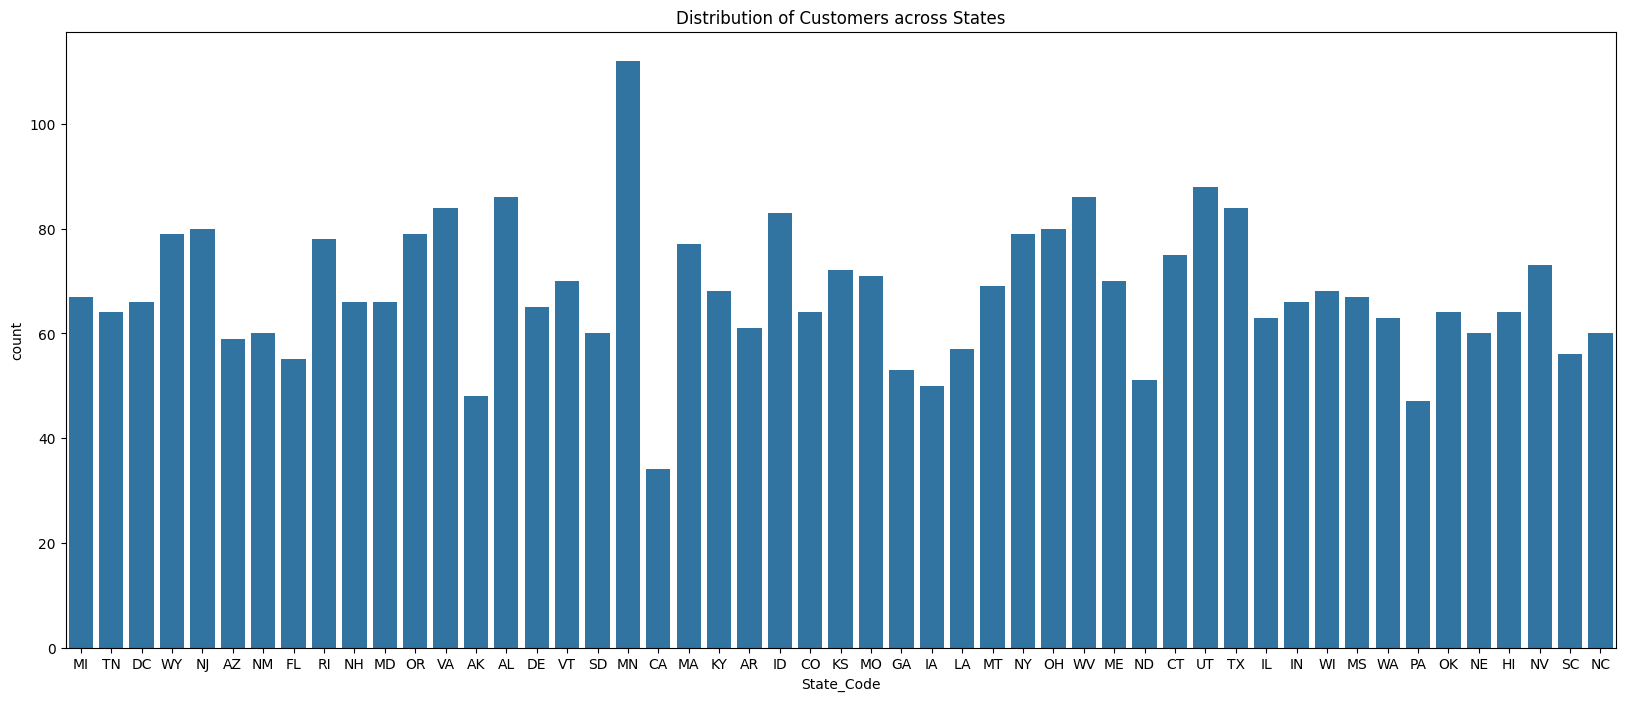

In [ ]:
# Using seaborn and matplotlib to visualize data
# This graph shows us the distribution of customers across different states
plt.figure(figsize=(20,8))
sns.countplot(x='State_Code', data=zela_df)
plt.title('Distribution of Customers across States')
plt.show()

From this countplot , we got to know that most of customers of Zela are from Minnessota ,Utah, West Virginia,Alabama followed by others

In [ ]:
zela_df['Churn'].value_counts()  # 498 customers of Zela have discontinued their service

,count
Churn,
0,2969
1,498


In [ ]:
churned_df=zela_df[zela_df.Churn == 1] # This is DataFrame of customers who discontinued their service
churned_df.head()

,State_Code,Account_Length_Months,Area_Code,Intl_Plan,VM_Plan,VM_Messages,Avg_Day_Minutes,Avg_Day_Calls,Avg_Day_Charge,Avg_Eve_Minutes,Avg_Eve_Calls,Avg_Eve_Charge,Avg_Night_Minutes,Avg_Night_Calls,Avg_Night_Charge,Avg_Intl_Minutes,Avg_Intl_Calls,Avg_Intl_Charge,Customer_Service_Calls,Churn
8,FL,98,415,0,0,0,0.00,0,0.00,171.02,138,20.00,169.22,93,8.46,7.82,1,2.04,4,1
9,NJ,131,408,1,0,0,132.22,88,24.35,127.30,100,14.88,149.77,100,7.50,15.76,3,4.11,3,1
11,NH,122,408,0,1,33,189.08,109,34.82,265.95,111,31.09,166.68,123,8.34,15.52,3,4.06,1,1
22,AK,40,510,0,0,0,183.46,122,33.79,151.51,130,17.71,256.20,122,12.82,12.08,3,3.16,4,1
40,DC,61,408,0,0,0,288.76,110,53.19,193.30,139,22.59,233.52,112,11.68,19.90,4,5.19,1,1


In [ ]:
continued_df=zela_df[zela_df.Churn == 0] # This is DataFrame of customers who still continue to use services of Zela
continued_df.head()

,State_Code,Account_Length_Months,Area_Code,Intl_Plan,VM_Plan,VM_Messages,Avg_Day_Minutes,Avg_Day_Calls,Avg_Day_Charge,Avg_Eve_Minutes,Avg_Eve_Calls,Avg_Eve_Charge,Avg_Night_Minutes,Avg_Night_Calls,Avg_Night_Charge,Avg_Intl_Minutes,Avg_Intl_Calls,Avg_Intl_Charge,Customer_Service_Calls,Churn
0,MI,36,510,0,0,0,193.08,88,35.56,228.34,109,26.68,200.51,126,10.03,12.54,6,3.27,1,0
1,TN,16,510,0,0,0,165.62,69,30.50,246.13,95,28.76,150.08,99,7.51,12.30,9,3.21,1,0
2,DC,99,415,0,0,0,216.22,70,39.83,115.62,110,13.51,236.66,87,11.84,13.11,2,3.42,3,0
3,WY,159,510,0,0,0,182.16,85,33.56,218.48,126,25.54,201.62,133,10.08,9.32,2,2.43,1,0
4,NJ,77,510,0,0,0,134.16,98,24.72,230.27,139,26.92,244.35,140,12.22,15.76,3,4.11,0,0


In [ ]:
churned_df['State_Code'].value_counts().head()
# Most churned customers are from New York , Rhode Island , Utah , West Virginia and the list continues.......

NY    24
RI    19
UT    19
WV    15
NJ    15
Name: State_Code, dtype: int64

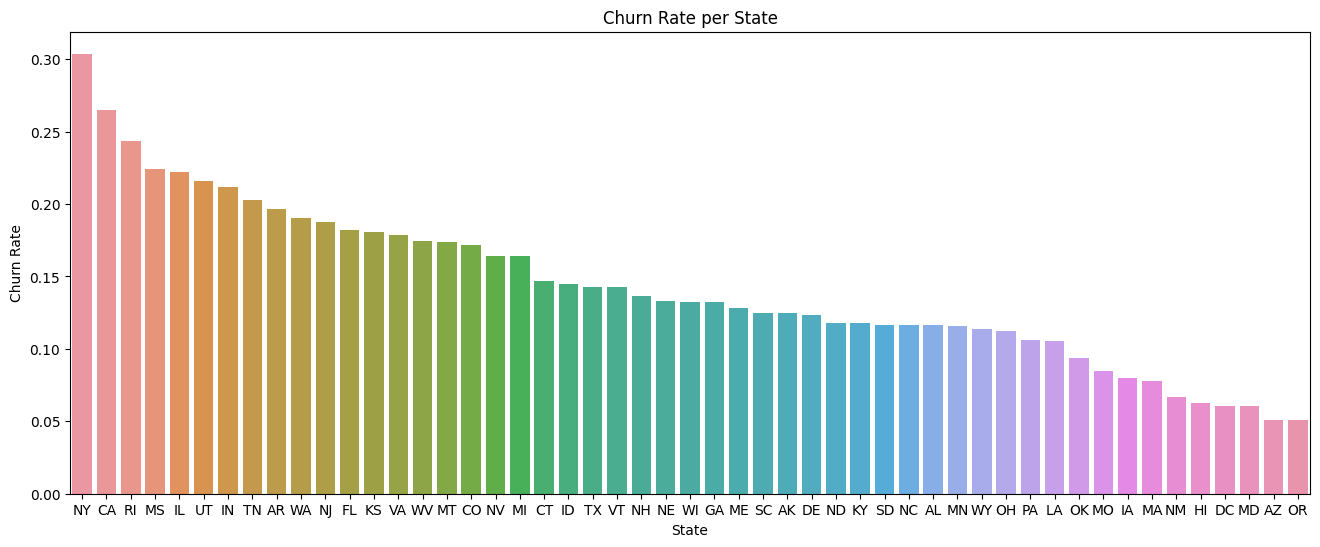

In [ ]:
# Now we will plot a bar graph to analyse the churn rate of customers from each state
churn_rate_per_state = zela_df.groupby('State_Code')['Churn'].mean().reset_index()

plt.figure(figsize=(16, 6))
sns.barplot(x='State_Code', y='Churn', data=churn_rate_per_state, order=churn_rate_per_state.sort_values('Churn', ascending=False)['State_Code'])
plt.title('Churn Rate per State')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.show()

We can understand that the customers from New York ,California, Rhode Island are unhappy by the services provided by Zela . So they have the highest churn rates whereas Oregon, Arizona,Maryland and Washington D.C. are strong zones of Zela


In [ ]:
# No. of churned customers in each area code
churned_df['Area_Code'].value_counts()

415    244
510    132
408    122
Name: Area_Code, dtype: int64

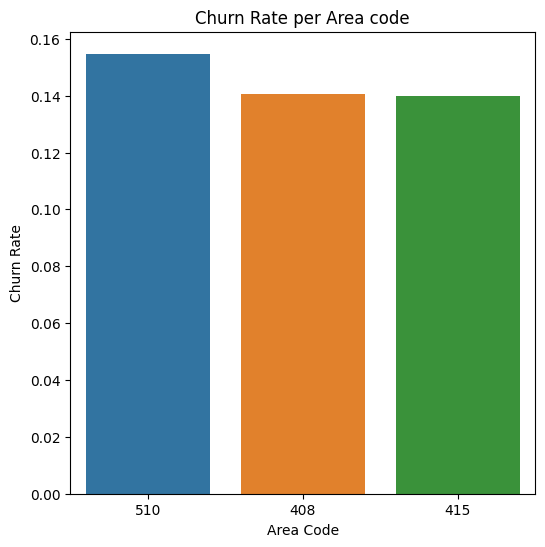

In [ ]:
# If we have plotted a graph of churn rate per state code , why not do the same for Area code
churn_rate_per_area = zela_df.groupby('Area_Code')['Churn'].mean().reset_index()

plt.figure(figsize=(6, 6))
sns.barplot(x='Area_Code', y='Churn', data=churn_rate_per_area, order=churn_rate_per_area.sort_values('Churn', ascending=False)['Area_Code'])
plt.title('Churn Rate per Area code')
plt.xlabel('Area Code')
plt.ylabel('Churn Rate')
plt.show()

Area code 510 comprises of most no. of people who left Zela and switched to other telecom providers

In [ ]:
# No. of churned customers for particular months
churned_df['Account_Length_Months'].value_counts().head()

88     9
98     8
125    8
77     8
103    8
Name: Account_Length_Months, dtype: int64

In [ ]:
# No. of service continued customers for particular months
continued_df['Account_Length_Months'].value_counts().head()

87     40
90     37
93     34
100    34
86     33
Name: Account_Length_Months, dtype: int64

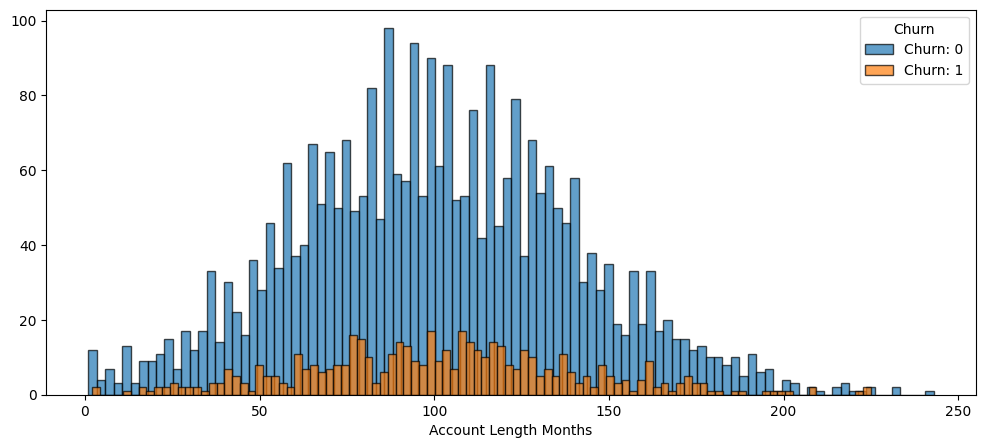

In [ ]:
# This graph shows us the distribution of churned and continued customers vs number of months
# blue - continued , orange - churned


fig, ax = plt.subplots(figsize=(12, 5))
ax.hist(x=zela_df[zela_df["Churn"] == 0]["Account_Length_Months"], bins=100, alpha=0.7, edgecolor='black', linewidth=1, label='Churn: 0')
ax.hist(x=zela_df[zela_df["Churn"] == 1]["Account_Length_Months"], bins=100, alpha=0.7, edgecolor='black', linewidth=1, label='Churn: 1')
ax.set(xlabel="Account Length Months")
ax.legend(title="Churn")

plt.show()

There is not a lot of difference between churn rates and Account length months and we did not find any pattern between churn and account length months. Maybe we need to perform feature importance test to  check does this feature has lot of importance or not.
Don't worry, we'll do it later....


In [ ]:
ch=churned_df.describe()
ch
# Statistical features of churned customers

,Account_Length_Months,Area_Code,Intl_Plan,VM_Plan,VM_Messages,Avg_Day_Minutes,Avg_Day_Calls,Avg_Day_Charge,Avg_Eve_Minutes,Avg_Eve_Calls,Avg_Eve_Charge,Avg_Night_Minutes,Avg_Night_Calls,Avg_Night_Charge,Avg_Intl_Minutes,Avg_Intl_Calls,Avg_Intl_Charge,Customer_Service_Calls,Churn
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.00000,498.000000,498.000000,498.000000,498.0
mean,102.236948,438.465863,0.285141,0.144578,4.574297,228.514378,106.236948,42.091627,223.779859,106.092369,26.156827,208.840562,103.821285,10.445100,12.34251,4.624498,3.220823,2.261044,1.0
std,39.348263,43.095886,0.451935,0.352029,11.458942,74.536937,22.847409,13.729286,53.921987,20.626883,6.302747,48.908256,21.085201,2.446095,3.19135,3.145941,0.832443,1.814354,0.0
min,2.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.970000,51.000000,8.890000,60.250000,44.000000,3.020000,0.00000,0.000000,0.000000,0.000000,1.0
25%,76.000000,415.000000,0.000000,0.000000,0.000000,167.082500,91.000000,30.780000,184.007500,92.000000,21.502500,174.582500,88.000000,8.727500,10.24000,2.000000,2.670000,1.000000,1.0
50%,102.000000,415.000000,0.000000,0.000000,0.000000,240.375000,107.000000,44.280000,224.380000,106.000000,26.230000,208.000000,105.000000,10.405000,12.24500,4.000000,3.195000,2.000000,1.0
75%,125.750000,510.000000,1.000000,0.000000,0.000000,289.620000,121.750000,53.340000,263.700000,120.000000,30.830000,243.975000,118.000000,12.205000,14.60000,7.000000,3.810000,4.000000,1.0
max,225.000000,510.000000,1.000000,1.000000,48.000000,380.000000,175.000000,70.000000,374.390000,168.000000,43.760000,386.430000,164.000000,19.320000,23.00000,22.000000,6.000000,9.000000,1.0


In [ ]:
co=continued_df.describe()
co
# Statistical features of retained customers

,Account_Length_Months,Area_Code,Intl_Plan,VM_Plan,VM_Messages,Avg_Day_Minutes,Avg_Day_Calls,Avg_Day_Charge,Avg_Eve_Minutes,Avg_Eve_Calls,Avg_Eve_Charge,Avg_Night_Minutes,Avg_Night_Calls,Avg_Night_Charge,Avg_Intl_Minutes,Avg_Intl_Calls,Avg_Intl_Charge,Customer_Service_Calls,Churn
count,2969.000000,2969.000000,2969.000000,2969.00000,2969.000000,2969.000000,2969.000000,2969.000000,2969.000000,2969.000000,2969.000000,2969.000000,2969.000000,2969.000000,2969.000000,2969.000000,2969.000000,2969.000000,2969.0
mean,100.332772,436.311216,0.064331,0.28225,8.219603,190.128723,105.925227,35.021516,212.714379,105.976423,24.863486,202.231738,105.589424,10.114668,11.698178,4.861570,3.052587,1.456046,0.0
std,39.923483,41.837650,0.245384,0.45017,13.756680,53.656510,20.872022,9.883344,53.448711,21.082404,6.247306,51.055878,21.276454,2.553565,3.177086,2.849795,0.828820,1.177409,0.0
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,44.680000,13.000000,5.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,72.000000,408.000000,0.000000,0.00000,0.000000,153.730000,92.000000,28.310000,177.020000,92.000000,20.690000,168.510000,91.000000,8.430000,9.780000,3.000000,2.560000,1.000000,0.0
50%,99.000000,415.000000,0.000000,0.00000,0.000000,193.190000,106.000000,35.590000,212.590000,106.000000,24.840000,202.530000,106.000000,10.130000,11.840000,4.000000,3.090000,1.000000,0.0
75%,127.000000,415.000000,0.000000,1.00000,20.000000,228.000000,120.000000,41.990000,248.490000,121.000000,29.040000,236.050000,119.000000,11.810000,13.800000,7.000000,3.600000,2.000000,0.0
max,243.000000,510.000000,1.000000,1.00000,52.000000,339.240000,170.000000,62.490000,376.750000,180.000000,44.040000,400.000000,185.000000,20.000000,22.660000,21.000000,5.910000,8.000000,0.0


Now that we have statistically analysed both churned and continued DataFrames , we should compare the mean value of each feature of both DataFrames. Look that which feature is significantly different in both DataFrames , they may be the reasons for churning of customers.

Also perform correlation analysis to find out which features are most responsible for churning , and plot graphs for each feature to make comparisons better and beautiful

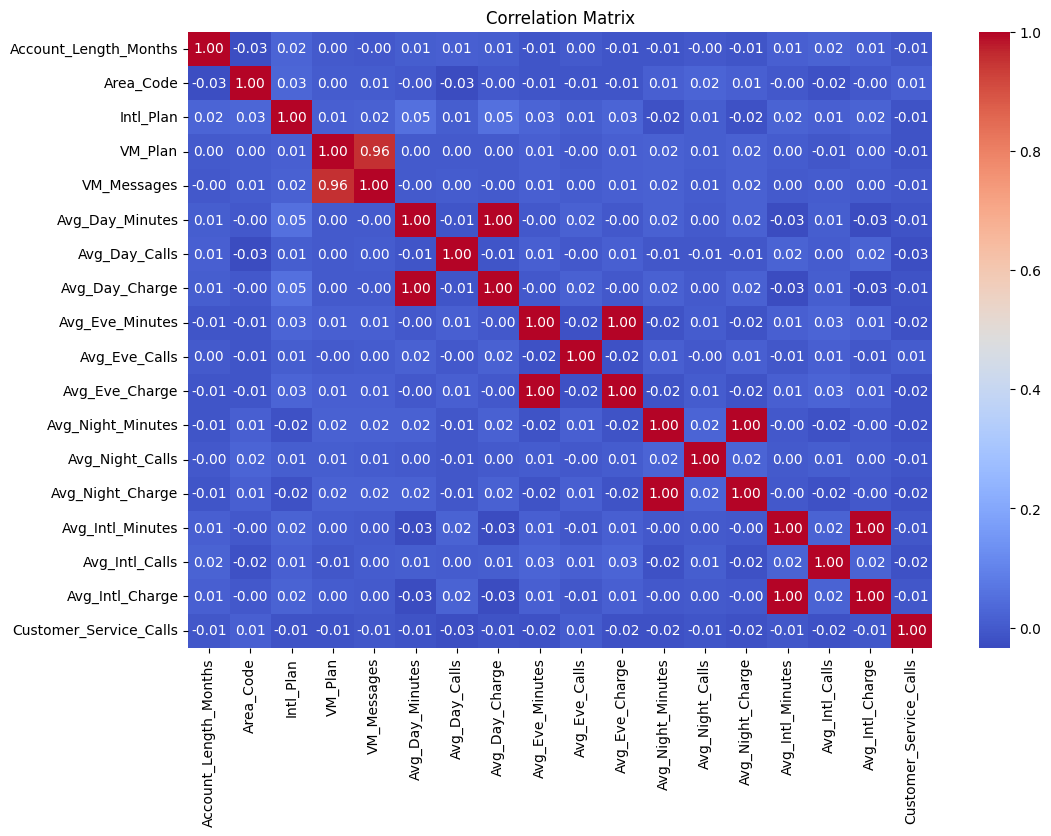

In [ ]:
# Let us perform a correlation analysis to calculate correlation coefficients between all features using heatmap
# It will help to uncover relationships and patterns within the data, and will show how different features
# interact with each other.
# This will help in feature selection
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix ,cmap='coolwarm', annot=True,fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# The bright red spots show the maximum correlation between the features where as dark blue ones show negative .
# It's recommended to use those negatively correlated features and remove positively correlated features .

# We can deduce following things from heatmap -

# 1 . Avg intl calls and customer service calls give - 0.02 correlation . so they can be used to analyze data
# 2 . VM plan has - 0.01 correlation with avg intl calls
# 3 . Similarly , VM plan has - 0.01 correlation with customer service calls
# 4 . One the other hand , avg day charge and avg day minutes are possitively correlated
# 5 . VM messages and VM plans are also correlated by index of 0.96

We gained a lot from above correlation matrix, right ? Now we'll make even better one !

Lets plot correlation matrix between features and target variable ( Churn) .It will show us which features have stronger correlation with Churn. Features with higher absolute values are strong predictors

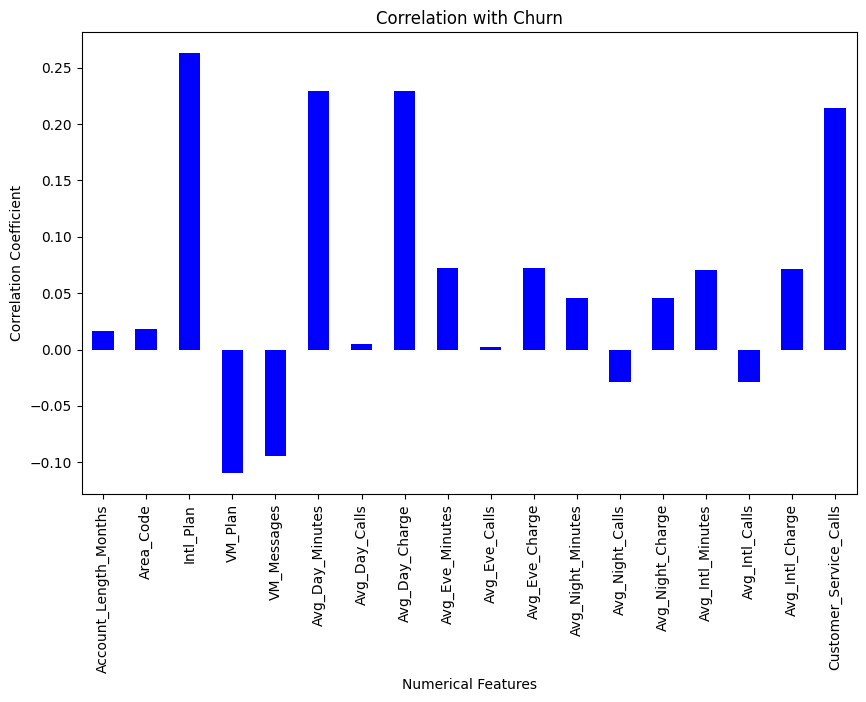

In [ ]:
numerical_features = zela_df.select_dtypes(include=['float64', 'int64']).columns
numerical_features = numerical_features.drop('Churn')  # Exclude the target variable

correlation_matrix = zela_df[numerical_features].corrwith(zela_df['Churn'])

plt.figure(figsize=(10, 6))
correlation_matrix.plot(kind='bar', color='blue')
plt.title('Correlation with Churn')
plt.xlabel('Numerical Features')
plt.ylabel('Correlation Coefficient')
plt.show()

Such a wonderful Graph !! It made our work easier . Now we can check correlation only for features like , International plan, VM plam, Customer service calls,Avg day mins and Avg day charge

From this we ubderstand that features like Intl_Plan, Avg day charge, avg day mins, Customer service calls have positive correlation with churn and VM plan and VM messages have negative correlation . Lets study the correlation of each of these features in detail

<Axes: xlabel='Intl_Plan', ylabel='Churn'>

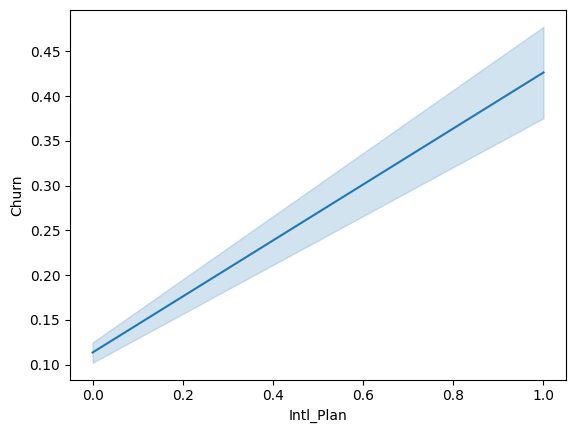

In [ ]:
# Lets begin our analysis by checking for international plan
sns.lineplot(x=zela_df['Intl_Plan'],y=zela_df['Churn'],data=zela_df)

From the above graph , we can correlate that international plan is directly proportional to Churn.
Most Customers who have purchased international plan tend to quit Zela's services

Shall we try to find any relation between churn and VM plans ...?
Why not ?

<Axes: xlabel='VM_Plan', ylabel='Churn'>

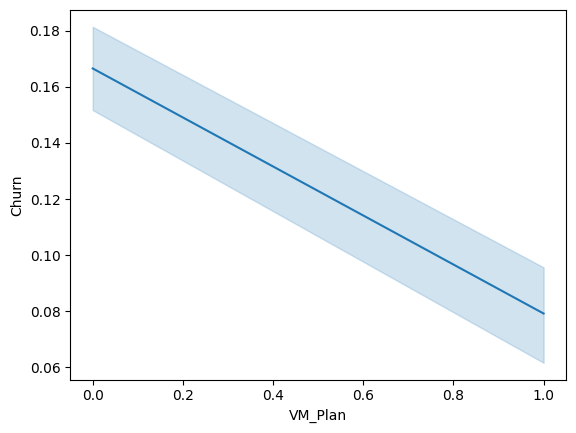

In [ ]:
sns.lineplot(x=zela_df['VM_Plan'],y=zela_df['Churn'],data=zela_df)

Yup !! we found another trend . Thanks to correlation matrix . It seems that customers who purchased voice mail plan tend to stay with Zela. Does this mean Zela offers very good voice mail plans ??? hmm.... we can't say this right now. We need to perform ML prediction but we'll do it later...

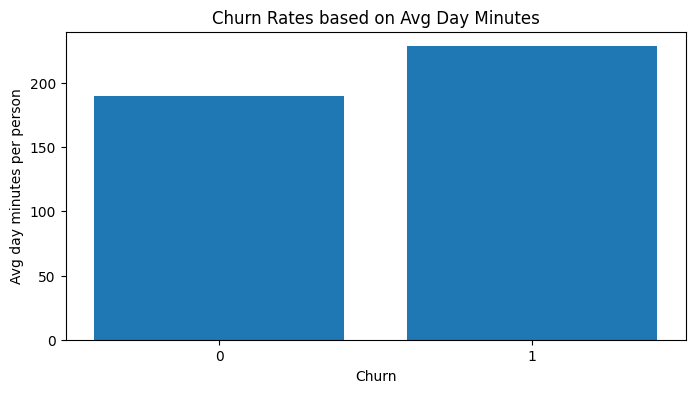

In [ ]:
#Let's also compare mean of average day minutes between two dataframes . Hope we find some relation this time tooo

B=ch.at['mean','Avg_Day_Minutes']
A=co.at['mean','Avg_Day_Minutes']

plt.figure(figsize=(8, 4))
labels=[0,1]
values=[A,B]
plt.bar(labels,values)
plt.title('Churn Rates based on Avg Day Minutes')
plt.xlabel('Churn')
plt.xticks(labels)
plt.ylabel('Avg day minutes per person')
plt.show()

Hmm.. seems interesting , customers who talked for longer time on phone tend to churn more. What can be the reason behind it ??? Is it the price that makes the difference ???  Let's see by plotting price vs churn graph

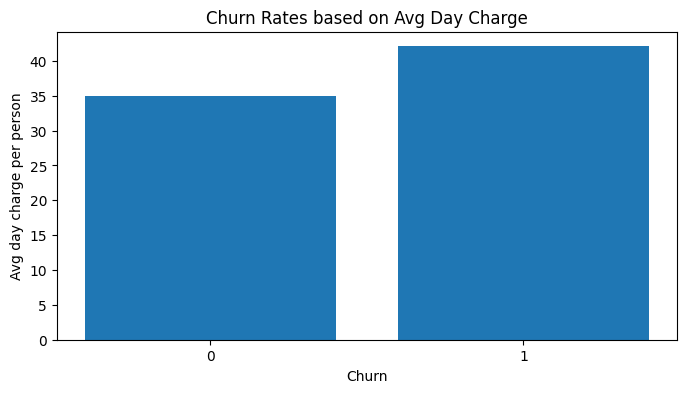

In [ ]:
D=ch.at['mean','Avg_Day_Charge']
C=co.at['mean','Avg_Day_Charge']

plt.figure(figsize=(8, 4))
labels=[0,1]
values=[C,D]
plt.bar(labels,values)
plt.title('Churn Rates based on Avg Day Charge')
plt.xlabel('Churn')
plt.xticks(labels)
plt.ylabel('Avg day charge per person')
plt.show()

Did I found the actual reason of churning ?? Customers were talking on phone for longer duration so their phone bills increased . You can see in graph . And that's why they discontinued Zela's services. Or is it just half of the entire picture ??? We will never know untill we perform feature analysis . But we'll do it later  

I can think of another theory ,maybe churning is happening bcz customers are dissatisfied by Zela's service . How do we check this ??? Maybe we can plot graph between churn and Customer Service Calls to see it !!

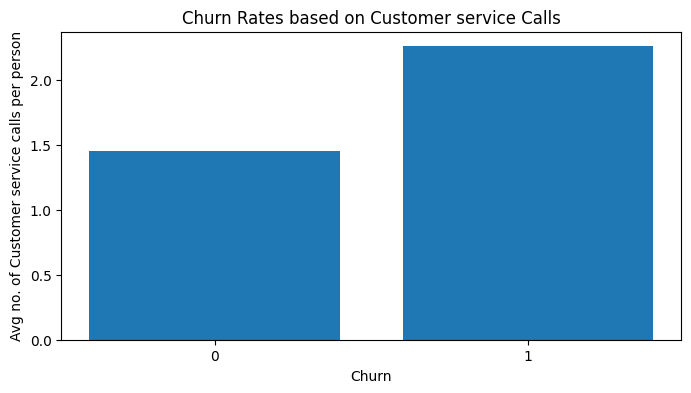

In [ ]:
N=ch.at['mean','Customer_Service_Calls']
M=co.at['mean','Customer_Service_Calls']

plt.figure(figsize=(8, 4))
labels=[0,1]
values=[M,N]
plt.bar(labels,values)
plt.title('Churn Rates based on Customer service Calls')
plt.xlabel('Churn')
plt.xticks(labels)
plt.ylabel('Avg no. of Customer service calls per person')
plt.show()

I think i predicted right .Churned customers did call Customer service a lot more times. Maybe bcz they were dissatisfied by service , or bcz customer service was not very helpful so they called multiple times for single problem . What strategies can we think for Zela to stop churning ? Improve customer service ??? First let us check all features and them make prediction at last  

I'm bored after adding lot of bar graphs and line graphs ,and i guess you too are bored!. Let's do some variety by plotting kernel density. It'll be interesting !!

<ipython-input-34-a6031718a011>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(zela_df[feature][zela_df['Churn'] == 0], label='Not Churn', shade=True)
<ipython-input-34-a6031718a011>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(zela_df[feature][zela_df['Churn'] == 1], label='Churn', shade=True)


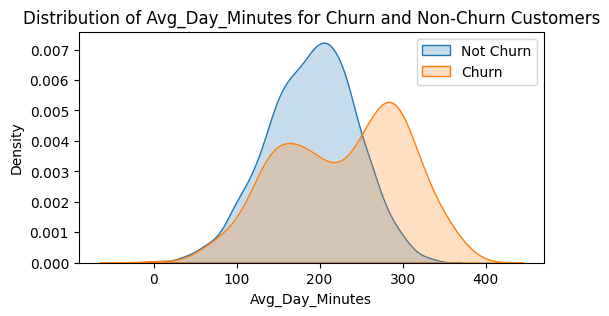

<ipython-input-34-a6031718a011>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(zela_df[feature][zela_df['Churn'] == 0], label='Not Churn', shade=True)
<ipython-input-34-a6031718a011>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(zela_df[feature][zela_df['Churn'] == 1], label='Churn', shade=True)


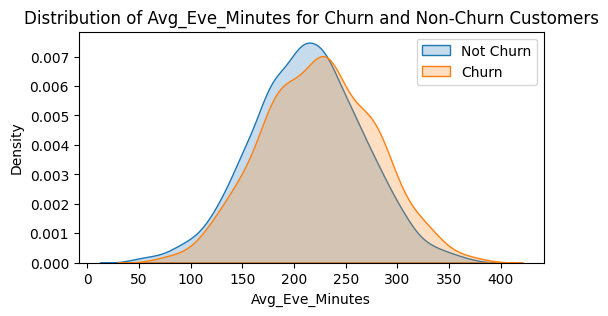

<ipython-input-34-a6031718a011>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(zela_df[feature][zela_df['Churn'] == 0], label='Not Churn', shade=True)
<ipython-input-34-a6031718a011>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(zela_df[feature][zela_df['Churn'] == 1], label='Churn', shade=True)


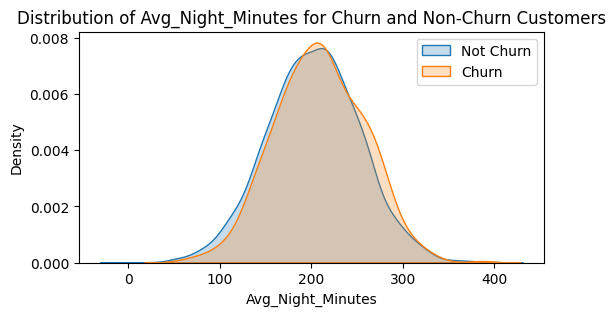

<ipython-input-34-a6031718a011>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(zela_df[feature][zela_df['Churn'] == 0], label='Not Churn', shade=True)
<ipython-input-34-a6031718a011>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(zela_df[feature][zela_df['Churn'] == 1], label='Churn', shade=True)


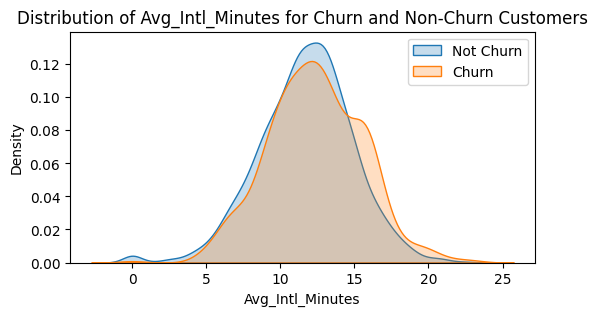

In [ ]:
# plotting a kernel density of avg minutes of day , evening, night and international
num_features = ['Avg_Day_Minutes', 'Avg_Eve_Minutes', 'Avg_Night_Minutes', 'Avg_Intl_Minutes']
for feature in num_features:
    plt.figure(figsize=(6, 3))
    sns.kdeplot(zela_df[feature][zela_df['Churn'] == 0], label='Not Churn', shade=True)
    sns.kdeplot(zela_df[feature][zela_df['Churn'] == 1], label='Churn', shade=True)
    plt.title(f'Distribution of {feature} for Churn and Non-Churn Customers')
    plt.legend()
    plt.show()

We can see that there isn't a lot of difference in evening, night and intl call minutes , but
avg day minutes is the differentiator . I think the customers who churned , talked for longer time on phone in day time , so their bills increased... I said na i will be interesting!!